<a href="https://colab.research.google.com/github/Nacho2904/orga_de_datos/blob/main/tp_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# TP1 - Pandas y Visualización de datos

## SetUp

In [303]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import nltk
from google.colab import drive 

drive.mount('/content/gdrive')
path_a_cast = 'gdrive/MyDrive/Movie dataset/cast.csv'
path_a_companies = 'gdrive/MyDrive/Movie dataset/companies.csv'
path_a_crew = 'gdrive/MyDrive/Movie dataset/crew.csv'
path_a_actores = 'gdrive/MyDrive/Movie dataset/imdb_actors.csv'
path_a_keywords = 'gdrive/MyDrive/Movie dataset/keywords.csv'
path_a_links = 'gdrive/MyDrive/Movie dataset/links.csv'
path_a_movies = 'gdrive/MyDrive/Movie dataset/movies.csv'
path_a_ratings = 'gdrive/MyDrive/Movie dataset/ratings.csv'

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


## Parte I: Pandas

### P2

- De las 10 películas más populares, ¿cuál es el título de la película que tiene más géneros asociados? ¿Cuáles son esos géneros?

In [2]:
# Leemos el dataset de películas con Pandas
df_movies = pd.read_csv(path_a_movies)
df_movies.head(1)

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:3326: DtypeWarning: Columns (10) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
0,False,Toy Story Collection,30000000,"Animation,Comedy,Family",http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",...,1995-10-30,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.7,5415.0


In [3]:
df_movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45466 entries, 0 to 45465
Data columns (total 24 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   adult                  45466 non-null  object 
 1   belongs_to_collection  4494 non-null   object 
 2   budget                 45466 non-null  object 
 3   genres                 43021 non-null  object 
 4   homepage               7782 non-null   object 
 5   id                     45466 non-null  object 
 6   imdb_id                45449 non-null  object 
 7   original_language      45455 non-null  object 
 8   original_title         45466 non-null  object 
 9   overview               44512 non-null  object 
 10  popularity             45461 non-null  object 
 11  poster_path            45080 non-null  object 
 12  production_companies   33585 non-null  object 
 13  production_countries   45463 non-null  object 
 14  release_date           45379 non-null  object 
 15  re

Vemos que el dataset soluciona nuestra primera cuestión: cómo ordenar las películas por popularidad. Examinamos la columna **popularity** que nos viene por defecto.

In [4]:
df_movies["popularity"]

0        21.946943
1        17.015539
2          11.7129
3         3.859495
4         8.387519
           ...    
45461     0.072051
45462     0.178241
45463     0.903007
45464     0.003503
45465     0.163015
Name: popularity, Length: 45466, dtype: object

Notamos más arriba del .info que su tipo es *object*. Intentamos transformarla a *float* para ver si hay valores que no son numéricos (si surge una excepción, habrá valores no numéricos).

In [5]:
#comento todo esto incluido el error porque si tengo que correr todo de vuelta me para la ejecución
#popularity_as_float = df_movies["popularity"].map(float)
"""
---------------------------------------------------------------------------

ValueError                                Traceback (most recent call last)

<ipython-input-21-384c6448775b> in <module>
----> 1 popularity_as_float = df_movies["popularity"].map(float)

2 frames

/usr/local/lib/python3.7/dist-packages/pandas/core/series.py in map(self, arg, na_action)
   4159         dtype: object
   4160         
-> 4161         new_values = super()._map_values(arg, na_action=na_action)
   4162         return self._constructor(new_values, index=self.index).__finalize__(
   4163             self, method="map"

/usr/local/lib/python3.7/dist-packages/pandas/core/base.py in _map_values(self, mapper, na_action)
    868 
    869         # mapper is a function
--> 870         new_values = map_f(values, mapper)
    871 
    872         return new_values

/usr/local/lib/python3.7/dist-packages/pandas/_libs/lib.pyx in pandas._libs.lib.map_infer()

ValueError: could not convert string to float: 'Beware Of Frost Bites'


"""

'\n---------------------------------------------------------------------------\n\nValueError                                Traceback (most recent call last)\n\n<ipython-input-21-384c6448775b> in <module>\n----> 1 popularity_as_float = df_movies["popularity"].map(float)\n\n2 frames\n\n/usr/local/lib/python3.7/dist-packages/pandas/core/series.py in map(self, arg, na_action)\n   4159         dtype: object\n   4160         \n-> 4161         new_values = super()._map_values(arg, na_action=na_action)\n   4162         return self._constructor(new_values, index=self.index).__finalize__(\n   4163             self, method="map"\n\n/usr/local/lib/python3.7/dist-packages/pandas/core/base.py in _map_values(self, mapper, na_action)\n    868 \n    869         # mapper is a function\n--> 870         new_values = map_f(values, mapper)\n    871 \n    872         return new_values\n\n/usr/local/lib/python3.7/dist-packages/pandas/_libs/lib.pyx in pandas._libs.lib.map_infer()\n\nValueError: could not conv

Efectivamente, hay filas en las que la columna popularidad contiene valores no numéricos. Abajo mostramos la que encontramos al intentar aplicar el map.

In [6]:
df_movies[df_movies["popularity"] == 'Beware Of Frost Bites']["popularity"].iloc[0]

'Beware Of Frost Bites'

Esto nos importa porque mientras haya filas que posean esa cualidad, no podemos ordenar el dataset para obtener las 10 películas más populares. Contamos la cantidad de películas con este problema:

In [7]:
pelis_polemicas = pd.to_numeric(df_movies["popularity"], errors = 'coerce')
df_movies[pelis_polemicas.isnull()][["original_title","vote_count"]]

,original_title,vote_count
19729,Midnight Man,NaN
19730,"[{'iso_639_1': 'en', 'name': 'English'}]",NaN
29502,マルドゥック・スクランブル 排気,NaN
29503,"[{'iso_639_1': 'ja', 'name': '日本語'}]",NaN
35586,Avalanche Sharks,NaN
35587,"[{'iso_639_1': 'en', 'name': 'English'}]",NaN


De casi 45500 filas, solo 6 tienen problemas (y ninguna de ellas parece honestamente muy relevante, pues ninguna tiene ni un solo voto). Las ignoraremos.

In [8]:
df_movies_modificado = pd.DataFrame.copy(df_movies)
df_movies_modificado["popularity"] = pd.to_numeric(df_movies["popularity"], errors = 'coerce').fillna(value=0)
df_movies_ordenado_por_popularidad = df_movies_modificado.sort_values(by="popularity", ascending = False)

Nos quedamos con las columnas relevantes de la tabla obtenida

In [9]:
top_10_peliculas = df_movies_ordenado_por_popularidad.head(10)[["original_title","genres"]]
top_10_peliculas

,original_title,genres
30700,Minions,"Family,Animation,Adventure,Comedy"
33356,Wonder Woman,"Action,Adventure,Fantasy"
42222,Beauty and the Beast,"Family,Fantasy,Romance"
43644,Baby Driver,"Action,Crime"
24455,Big Hero 6,"Adventure,Family,Animation,Action,Comedy"
26564,Deadpool,"Action,Adventure,Comedy"
26566,Guardians of the Galaxy Vol. 2,"Action,Adventure,Comedy,Science Fiction"
14551,Avatar,"Action,Adventure,Fantasy,Science Fiction"
24351,John Wick,"Action,Thriller"
23675,Gone Girl,"Mystery,Thriller,Drama"


Finalmente, obtenemos la respuesta al ejercicio aplicando las transformaciones adecuadas a nuestra tabla.

In [10]:
cantidad_de_generos = lambda generos: len(generos.split(","))
top_10_peliculas["cantidad_de_generos"] = top_10_peliculas["genres"].map(cantidad_de_generos)
max_generos = max(top_10_peliculas["cantidad_de_generos"])
top_10_peliculas[top_10_peliculas["cantidad_de_generos"] == max_generos][["original_title","genres"]]

,original_title,genres
24455,Big Hero 6,"Adventure,Family,Animation,Action,Comedy"


### P27

- En todo el mundo el estado financia parcialmente al cine de las productoras locales. Una preocupación creciente es la existencia de ñoquis en las crew de las películas que son amigos o conocidos de la producción de las mismas a expensas de fondos del estado. La consultora “Espumadera” es una startup Argentina se dedica a encontrar posibles ñoquis para auditar en distintos contextos y tiene como clientes a organismos estatales de todo el mundo. Deseamos buscar anomalías para auditar en la crew de las películas, ¿Quienes superan el **percentil 95** de producciones en las que **participaron en roles distintos de directores, productores o escritores en el mismo año de estreno**?

In [11]:
df_crew = pd.read_csv(path_a_crew)
df_crew.info( )

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 464314 entries, 0 to 464313
Data columns (total 5 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   id          464314 non-null  int64 
 1   crew_id     464314 non-null  int64 
 2   department  464314 non-null  object
 3   job         464314 non-null  object
 4   name        464314 non-null  object
dtypes: int64(2), object(3)
memory usage: 17.7+ MB


Teniendo la tabla *df_crew*, filtramos las columnas para quedarnos con las relevantes al análisis, y filtramos los roles a lo que nos pide el ejercicio.

In [12]:
df_crew_filtrado = df_crew[["id","crew_id","job","name"]]
df_crew_filtrado = df_crew_filtrado[df_crew_filtrado["job"].isin(["Director", "Producer", "Writer"])]

Ahora queremos agregar algo de información sobre las películas, específicamente su año de estreno. Para lograr eso podemos utilizar un join. Primero miramos un poco la tabla de películas

In [13]:
df_movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45466 entries, 0 to 45465
Data columns (total 24 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   adult                  45466 non-null  object 
 1   belongs_to_collection  4494 non-null   object 
 2   budget                 45466 non-null  object 
 3   genres                 43021 non-null  object 
 4   homepage               7782 non-null   object 
 5   id                     45466 non-null  object 
 6   imdb_id                45449 non-null  object 
 7   original_language      45455 non-null  object 
 8   original_title         45466 non-null  object 
 9   overview               44512 non-null  object 
 10  popularity             45461 non-null  object 
 11  poster_path            45080 non-null  object 
 12  production_companies   33585 non-null  object 
 13  production_countries   45463 non-null  object 
 14  release_date           45379 non-null  object 
 15  re

Nos interesa el *id* para poder utilizarlo en el *join*, y el *release_date* porque es casi exactamente lo que estamos buscando. También nos interesa conocer si toda la columna *release_date* está en formato correcto.

In [14]:
df_movies_filtrado = df_movies[["id", "release_date"]]
df_movies_filtrado["release_date"] 

0        1995-10-30
1        1995-12-15
2        1995-12-22
3        1995-12-22
4        1995-02-10
            ...    
45461           NaN
45462    2011-11-17
45463    2003-08-01
45464    1917-10-21
45465    2017-06-09
Name: release_date, Length: 45466, dtype: object

Solo con ver la columna a ojo vemos que hay un *NaN*, lo que significa que no todas las pelis tienen la fecha de estreno. Lidiaremos con eso utilizando un *inner join* para quedarnos con todas las pelis que sí tengan dicha columna. Dicho eso, filtramos otra vez nuestra tabla de películas para eliminar dichos casos, y nos quedamos con el año en cada fila.

In [15]:
extract_year = lambda date: date.split("-")[0]
df_movies_filtrado_not_null = pd.DataFrame.copy(df_movies_filtrado[df_movies_filtrado["release_date"].notnull()])
df_movies_with_year = pd.DataFrame.copy(df_movies_filtrado_not_null)
df_movies_with_year["release_year"] = df_movies_filtrado_not_null["release_date"].map(extract_year)
df_movies_with_year["release_year"].unique()

array(['1995', '1996', '1994', '1997', '1976', '1992', '1967', '1993',
       '1964', '1977', '1965', '1982', '1985', '1990', '1991', '1989',
       '1937', '1940', '1969', '1981', '1974', '1970', '1960', '1955',
       '1959', '1968', '1980', '1988', '1975', '2002', '1948', '1943',
       '1950', '1987', '1973', '1956', '1958', '1949', '1972', '1953',
       '1998', '1933', '2010', '1952', '1951', '1957', '1961', '1954',
       '1934', '1944', '1963', '1942', '1941', '1939', '1947', '1946',
       '1945', '1938', '1935', '1936', '1926', '1932', '1979', '1971',
       '1986', '2013', '1978', '1966', '1962', '1983', '1984', '1931',
       '1922', '1999', '1927', '1929', '1930', '1928', '2012', '1925',
       '2000', '1919', '1923', '1920', '1918', '1921', '2001', '2011',
       '1924', '2003', '2004', '1915', '1916', '1917', '2005', '2006',
       '1902', '1903', '2007', '2008', '2009', '1914', '1912', '1913',
       '1898', '1899', '1894', '1909', '1910', '1901', '1893', '1896',
      

Vemos que hay un par de errores, específicamente tenemos años 1, 12, 22.

In [16]:
df_movies_filtrado_not_null[df_movies_with_year["release_year"] == "1"]

,id,release_date
19730,1997-08-20,1


In [17]:
df_movies_filtrado_not_null[df_movies_with_year["release_year"] == "12"]

,id,release_date
29503,2012-09-29,12


In [18]:
df_movies_filtrado_not_null[df_movies_with_year["release_year"] == "22"]

,id,release_date
35587,2014-01-01,22


En los 3 casos notamos que el id está donde debería estar el release date y viceversa. Arreglamos esto.

In [19]:
df_movies_filtrado_not_null.at[df_movies_with_year["release_year"] == "1","release_date"] = "1997-08-20"
df_movies_filtrado_not_null.at[df_movies_with_year["id"] == "1997-08-20","id"] = 1
df_movies_filtrado_not_null.at[df_movies_with_year["release_year"] == "12","release_date"] = "2012-09-29"
df_movies_filtrado_not_null.at[df_movies_with_year["id"] == "2012-09-29","id"] = 12
df_movies_filtrado_not_null.at[df_movies_with_year["release_year"] == "22","release_date"] = "2014-01-01"
df_movies_filtrado_not_null.at[df_movies_with_year["id"] == "2014-01-01","id"] = 22

In [20]:
df_movies_with_year = pd.DataFrame.copy(df_movies_filtrado_not_null)
df_movies_with_year["release_year"] = df_movies_filtrado_not_null["release_date"].map(extract_year)
df_movies_with_year["release_year"].unique()

array(['1995', '1996', '1994', '1997', '1976', '1992', '1967', '1993',
       '1964', '1977', '1965', '1982', '1985', '1990', '1991', '1989',
       '1937', '1940', '1969', '1981', '1974', '1970', '1960', '1955',
       '1959', '1968', '1980', '1988', '1975', '2002', '1948', '1943',
       '1950', '1987', '1973', '1956', '1958', '1949', '1972', '1953',
       '1998', '1933', '2010', '1952', '1951', '1957', '1961', '1954',
       '1934', '1944', '1963', '1942', '1941', '1939', '1947', '1946',
       '1945', '1938', '1935', '1936', '1926', '1932', '1979', '1971',
       '1986', '2013', '1978', '1966', '1962', '1983', '1984', '1931',
       '1922', '1999', '1927', '1929', '1930', '1928', '2012', '1925',
       '2000', '1919', '1923', '1920', '1918', '1921', '2001', '2011',
       '1924', '2003', '2004', '1915', '1916', '1917', '2005', '2006',
       '1902', '1903', '2007', '2008', '2009', '1914', '1912', '1913',
       '1898', '1899', '1894', '1909', '1910', '1901', '1893', '1896',
      

Notamos también que antes la columna id era de tipo *object* por la presencia de las fechas mezcladas. Habiendo arreglado eso podemos arreglar todo a int

In [21]:
df_movies_with_year["id"] = pd.to_numeric(df_movies_with_year["id"], downcast="signed")
df_movies_with_year.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 45379 entries, 0 to 45465
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            45379 non-null  int32 
 1   release_date  45379 non-null  object
 2   release_year  45379 non-null  object
dtypes: int32(1), object(2)
memory usage: 2.2+ MB


Por fin estamos en condiciones como para realizar el join. 

In [22]:
df_crew_with_years = pd.merge(df_crew_filtrado,df_movies_with_year,on='id', how = "inner")
df_crew_with_years

,id,crew_id,job,name,release_date,release_year
0,862,7879,Director,John Lasseter,1995-10-30,1995
1,862,12894,Producer,Bonnie Arnold,1995-10-30,1995
2,862,12896,Producer,Ralph Guggenheim,1995-10-30,1995
3,8844,4945,Director,Joe Johnston,1995-12-15,1995
4,8844,9184,Producer,Scott Kroopf,1995-12-15,1995
...,...,...,...,...,...,...
123161,111109,1051381,Writer,Lav Diaz,2011-11-17,2011
123162,67758,67753,Director,Mark L. Lester,2003-08-01,2003
123163,227506,1085341,Director,Yakov Protazanov,1917-10-21,1917
123164,227506,1195656,Producer,Joseph N. Ermolieff,1917-10-21,1917


Agrupamos por actor y por año de estreno:

In [23]:
df_crew_count_by_year = df_crew_with_years.groupby(["crew_id", "release_year"]).agg(
    appearances = ("release_year", "count")).reset_index()
df_crew_count_by_year.head()

,crew_id,release_year,appearances
0,1,1967,2
1,1,1971,1
2,1,1973,1
3,1,1977,2
4,1,1985,1


In [24]:
#volvemos a agrupar por actor para sacar la máxima cantidad de participaciones que logró en un solo año
df_max_crew_appearances_per_year = df_crew_count_by_year.groupby("crew_id").agg(max_appearances=("appearances",max)).reset_index()
quantile_95th = df_max_crew_appearances_per_year["max_appearances"].quantile(0.95)
df_max_crew_appearances_per_year[df_max_crew_appearances_per_year["max_appearances"] > quantile_95th]

,crew_id,max_appearances
9,24,4
15,32,4
19,40,4
22,59,7
28,67,4
...,...,...
39415,1341689,4
40582,1386894,6
41011,1410876,4
44669,1621038,4


Vemis que hay un total de 639 miembros de una crew que superan dicho percentil. Podemos encontrar sus nombres fácilmente:

In [25]:
suspect_crew_members = pd.merge(df_crew_filtrado,
                                df_max_crew_appearances_per_year[df_max_crew_appearances_per_year["max_appearances"] > quantile_95th],
                                on='crew_id', 
                                how = "right")
suspect_crew_members


,id,crew_id,job,name,max_appearances
0,13,24,Director,Robert Zemeckis,4
1,105,24,Director,Robert Zemeckis,4
2,105,24,Writer,Robert Zemeckis,4
3,686,24,Director,Robert Zemeckis,4
4,686,24,Producer,Robert Zemeckis,4
...,...,...,...,...,...
13496,429779,1827779,Director,Shannon Hartman,4
13497,429779,1827779,Producer,Shannon Hartman,4
13498,337405,1827779,Director,Shannon Hartman,4
13499,419037,1827779,Director,Shannon Hartman,4


Por curiosidad, busco el top 10

In [26]:
suspect_crew_members.groupby("name").agg(appearances=("max_appearances","max")).sort_values("appearances", ascending=False)[:10]

,appearances
name,
Charlie Chaplin,22
JP Siili,18
Buster Keaton,14
David Michael Latt,14
Georges Méliès,12
Jason Blum,12
Max Linder,12
William K.L. Dickson,12
Frank Capra,11


### P20

- ¿Cuál es la probabilidad de que una película de un género en particular tenga una calificación promedio mayor a 7? Obtenga las probabilidades de cada género posible.

In [27]:
df_ratings = pd.read_csv(path_a_ratings)
df_ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26024289 entries, 0 to 26024288
Data columns (total 4 columns):
 #   Column     Dtype  
---  ------     -----  
 0   userId     int64  
 1   movieId    int64  
 2   rating     float64
 3   timestamp  int64  
dtypes: float64(1), int64(3)
memory usage: 794.2 MB


In [28]:
df_movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45466 entries, 0 to 45465
Data columns (total 24 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   adult                  45466 non-null  object 
 1   belongs_to_collection  4494 non-null   object 
 2   budget                 45466 non-null  object 
 3   genres                 43021 non-null  object 
 4   homepage               7782 non-null   object 
 5   id                     45466 non-null  object 
 6   imdb_id                45449 non-null  object 
 7   original_language      45455 non-null  object 
 8   original_title         45466 non-null  object 
 9   overview               44512 non-null  object 
 10  popularity             45461 non-null  object 
 11  poster_path            45080 non-null  object 
 12  production_companies   33585 non-null  object 
 13  production_countries   45463 non-null  object 
 14  release_date           45379 non-null  object 
 15  re

Filtramos las columnas importantes: Vamos a necesitar el id y el género para hacer un *join* con la tabla **ratings**. Primero que nada, sería útil conocer que géneros tenemos, y sacarnos de encima las pelis de las que no conocemos el género.

In [29]:
df_movies_filtered = df_movies[["id", "genres"]]
def add_genre(genre_string:str, known_genres:dict)->None:
  genres_in_string = genre_string.split(",")
  for genre in genres_in_string:
    if not known_genres.get(genre):
      known_genres.update({genre:len(known_genres)})

known_genres = {}
obtain_existing_genres = lambda genre: add_genre(genre, known_genres)
df_movies_filtered = df_movies_filtered[df_movies_filtered["genres"].notnull()]
df_movies_filtered["genres"].map(obtain_existing_genres)
df_movies_filtered["id"] = pd.to_numeric(df_movies_filtered["id"], errors = "coerce")
known_genres = sorted(list(known_genres.keys()))
known_genres

['Action',
 'Adventure',
 'Animation',
 'Comedy',
 'Crime',
 'Documentary',
 'Drama',
 'Family',
 'Fantasy',
 'Foreign',
 'History',
 'Horror',
 'Music',
 'Mystery',
 'Romance',
 'Science Fiction',
 'TV Movie',
 'Thriller',
 'War',
 'Western']

Realizamos el join de **df_ratings** con **df_movies_filtered**, previamente filtrando las columnas relevantes del primero (movie_id, rating)..

In [30]:
df_ratings_filtered = df_ratings[["movieId", "rating"]]
df_ratings_filtered.columns = ["id", "rating"]
df_ratings_and_genres = pd.merge(df_ratings_filtered, df_movies_filtered, on="id", how="inner")
df_ratings_and_genres

,id,rating,genres
0,110,1.0,"Drama,Mystery,Romance"
1,110,3.5,"Drama,Mystery,Romance"
2,110,5.0,"Drama,Mystery,Romance"
3,110,5.0,"Drama,Mystery,Romance"
4,110,3.0,"Drama,Mystery,Romance"
...,...,...,...
11382416,125249,3.5,Action
11382417,140222,3.0,"Drama,Romance,War"
11382418,151509,3.0,"Comedy,Music,Mystery"
11382419,159109,1.5,"Comedy,Drama,Horror,Mystery"


Ahora, agrupamos por id de la película y agregamos por promedio de ratings

In [31]:
df_mean_ratings_and_genres = df_ratings_and_genres.groupby(["id","genres"]).agg(mean_rating = ("rating", "mean")).reset_index()
df_mean_ratings_and_genres

,id,genres,mean_rating
0,2,"Drama,Crime",3.236953
1,3,"Drama,Comedy",3.175550
2,5,"Crime,Comedy",3.079565
3,6,"Action,Thriller,Crime",3.841764
4,11,"Adventure,Action,Science Fiction",3.660591
...,...,...,...
7189,176037,Thriller,2.000000
7190,176077,Thriller,3.500000
7191,176085,Comedy,3.000000
7192,176143,"War,Drama",3.500000


Para calcular la probabilidad de que una película de cierto género específico supere 3.5 de rating promedio (el equivalente de 7 yendo de 0 a 5) utilizamos la función de probabilidad:
- $\mathbb{P}(A_g) = \frac{|A_g|}{|D_g|}$

Donde 
- $A_g$ = "película del género $g$ tiene rating promedio mayor a 7"
- $|A_g| = $ cantidad de películas con promedio mayores a 7 del género $g$ 
- $|D_g|=$ cantidad de películas

In [32]:
total_movies_by_genre = {genre:0 for genre in known_genres}
positively_rated_by_genre = {genre:0 for genre in known_genres}
for genre in known_genres:
  total_movies_by_genre[genre] = np.sum(df_mean_ratings_and_genres["genres"].str.contains(genre))
  positively_rated_by_genre[genre] = np.sum((df_mean_ratings_and_genres["genres"].str.contains(genre)) & 
                                            (df_mean_ratings_and_genres["mean_rating"] > 3.5))

In [33]:
probabilities_by_genre = {genre:positively_rated_by_genre[genre]/total_movies_by_genre[genre] for genre in known_genres}
probabilities_by_genre

{'Action': 0.2919148936170213,
 'Adventure': 0.2984441301272984,
 'Animation': 0.3094170403587444,
 'Comedy': 0.28612032212221694,
 'Crime': 0.2883977900552486,
 'Documentary': 0.2729083665338645,
 'Drama': 0.2805697393173878,
 'Family': 0.2772020725388601,
 'Fantasy': 0.2678185745140389,
 'Foreign': 0.26199261992619927,
 'History': 0.28104575163398693,
 'Horror': 0.2752420470262794,
 'Music': 0.29838709677419356,
 'Mystery': 0.2631578947368421,
 'Romance': 0.2962655601659751,
 'Science Fiction': 0.2984822934232715,
 'TV Movie': 0.19540229885057472,
 'Thriller': 0.27578947368421053,
 'War': 0.2813852813852814,
 'Western': 0.31891891891891894}

Con eso ya resolvimos el problema de encontrar la probabilidad por cada género.

### N7


-  Dado el ROI de las películas, para aquellas cuyo ROI (Return of Investment) esté entre -10 y 10. ¿Cúal es el top 10 palabras que aparecen más de 5 veces y no son stopwords que generan mayor ROI promedio según su aparición en las descripciones?

In [100]:
df_movies = pd.read_csv(path_a_movies)
df_movies.columns

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:3326: DtypeWarning: Columns (10) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


Index(['adult', 'belongs_to_collection', 'budget', 'genres', 'homepage', 'id',
       'imdb_id', 'original_language', 'original_title', 'overview',
       'popularity', 'poster_path', 'production_companies',
       'production_countries', 'release_date', 'revenue', 'runtime',
       'spoken_languages', 'status', 'tagline', 'title', 'video',
       'vote_average', 'vote_count'],
      dtype='object')

Primero filtramos el dataset según nos pide (ROI entre -10 y 10). Antes de eso nos quedamos con las columnas relevantes para el caso: *id*,  *overview*,  *budget*, *revenue*.

In [101]:
df_movies_filtered = df_movies[["id","overview","budget","revenue"]]
df_movies_filtered.head(3)

,id,overview,budget,revenue
0,862,"Led by Woody, Andy's toys live happily in his ...",30000000,373554033.0
1,8844,When siblings Judy and Peter discover an encha...,65000000,262797249.0
2,15602,A family wedding reignites the ancient feud be...,0,0.0


Verificamos que *budget* y *revenue* estén con tipo correcto

In [102]:
df_movies_filtered.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45466 entries, 0 to 45465
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        45466 non-null  object 
 1   overview  44512 non-null  object 
 2   budget    45466 non-null  object 
 3   revenue   45460 non-null  float64
dtypes: float64(1), object(3)
memory usage: 1.4+ MB


No lo están. Los transformamos a tipo numérico

In [103]:
df_movies_filtered["revenue"] = pd.to_numeric(df_movies_filtered["revenue"], errors = "coerce")
df_movies_filtered["budget"] = pd.to_numeric(df_movies_filtered["budget"], errors = "coerce")
df_movies_filtered = df_movies_filtered[(df_movies_filtered["revenue"].notnull()) & (df_movies_filtered["budget"].notnull())]
df_movies_filtered.info()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


<class 'pandas.core.frame.DataFrame'>
Int64Index: 45460 entries, 0 to 45465
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        45460 non-null  object 
 1   overview  44506 non-null  object 
 2   budget    45460 non-null  float64
 3   revenue   45460 non-null  float64
dtypes: float64(2), object(2)
memory usage: 1.7+ MB


Calculamos el ROI como:
- $ROI = \frac{revenue - budget}{budget} \cdot 100$

In [104]:
df_movies_filtered["ROI"] = 100*(df_movies_filtered["revenue"] - df_movies_filtered["budget"])/df_movies_filtered["revenue"]
df_movies_filtered.head(3)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,id,overview,budget,revenue,ROI
0,862,"Led by Woody, Andy's toys live happily in his ...",30000000.0,373554033.0,91.969033
1,8844,When siblings Judy and Peter discover an encha...,65000000.0,262797249.0,75.266103
2,15602,A family wedding reignites the ancient feud be...,0.0,0.0,NaN


Vemos que hay algunos con ROI *Nan* porque el revenue es 0. Los eliminamos de la tabla.

In [105]:
df_movies_filtered = df_movies_filtered[df_movies_filtered["ROI"].notnull()]
df_movies_filtered.head(3)

,id,overview,budget,revenue,ROI
0,862,"Led by Woody, Andy's toys live happily in his ...",30000000.0,373554033.0,91.969033
1,8844,When siblings Judy and Peter discover an encha...,65000000.0,262797249.0,75.266103
3,31357,"Cheated on, mistreated and stepped on, the wom...",16000000.0,81452156.0,80.356567


Ahora estamos en condiciones de filtrar aquellos que tienen ROI entre -10 y 10, y nos quedamos con *overview*, *ROI*.

In [106]:
df_movies_roi_filtered = df_movies_filtered[(df_movies_filtered["ROI"] > -10) & (df_movies_filtered["ROI"] < 10)]
df_descriptions_roi_filtered = df_movies_roi_filtered[["overview", "ROI"]]
df_descriptions_roi_filtered

,overview,ROI
17,It's Ted the Bellhop's first night on the job....,6.976744
44,Susan wants to work in television and will the...,6.034970
88,Gene Watson is a public accountant who arrives...,0.073183
210,"Russia, 1936: revolutionary hero Colonel Kotov...",-7.013063
332,Gilbert has to care for his brother Arnie and ...,-9.640762
...,...,...
41928,Undercover Las Vegas police officer Vincent Do...,7.807687
43057,The adventures of two California Highway Patro...,6.716947
43649,"The story of Orisbela, a young and religious w...",0.000000
43999,After a stunning victory at a cyber sport tour...,5.517967


La pregunta es: 
- ¿Cúal es el top 10 palabras que aparecen más de 5 veces y no son stopwords que generan mayor ROI promedio según su aparición en las descripciones?

Para responderla primero eliminamos todas las stopwords. Importamos stopwords y un tokenizer de *nltk*

In [107]:
nltk.download('stopwords')
stopwords = nltk.corpus.stopwords.words('english')
tokenize = nltk.tokenize.WordPunctTokenizer().tokenize

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [108]:
tokenize("Susan wants to work in television and will")

['Susan', 'wants', 'to', 'work', 'in', 'television', 'and', 'will']

In [109]:
annoying_characters = [")", "(", ".", ",", "!", "?", "-", "_"]
contains_annoying_char = lambda token: any([character in token for character in annoying_characters])
low_case_tokenize = lambda text: [token.lower() for token in tokenize(text)]
tokenize_removing_stopwords = lambda text: [token for token in low_case_tokenize(text) if token not in stopwords]
tokenize_removing_bad_tokens = lambda text: [token for token in tokenize_removing_stopwords(text)\
                                             if not contains_annoying_char(token) and len(token) > 1]
df_descriptions_roi_filtered["overviewAsVector"] = df_descriptions_roi_filtered["overview"].map(tokenize_removing_bad_tokens)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


Nos quedamos con nuestros nuevos vectores de palabras y con el *ROI*, y realizamos un ```explode``` para poder agrupar por palabra. Luego efectivamente agrupamos para obtener el conteo de apariciones de cada palabra y su *ROI* promedio.

In [110]:
df_descriptions_as_vectors = df_descriptions_roi_filtered[["overviewAsVector", "ROI"]]
df_words_and_roi = df_descriptions_as_vectors.explode("overviewAsVector")
df_words_and_roi_grouped = df_words_and_roi.groupby("overviewAsVector").agg(appearances=("overviewAsVector", "count"),
                                                                            meanROI = ("ROI", "mean")).reset_index()

In [111]:
df_words_and_roi_grouped

,overviewAsVector,appearances,meanROI
0,000,2,-3.517705
1,10,4,5.160210
2,10th,1,-5.263158
3,11,1,9.430361
4,114,1,-6.723586
...,...,...,...
3848,zathura,1,-1.054856
3849,zeal,1,0.000000
3850,zombie,1,-0.936923
3851,zone,2,6.316418


Finalmente filtramos por palabras que aparezcan más de 5 veces, y ordenamos por *meanROI* para obtener nuestro resultado final.

In [112]:
df_words_and_roi_grouped_filtered = df_words_and_roi_grouped[df_words_and_roi_grouped["appearances"] > 5]
df_words_and_roi_grouped_filtered.sort_values("meanROI", ascending = False).head(10)

,overviewAsVector,appearances,meanROI
1401,football,8,6.569362
740,college,7,6.269244
3398,television,6,5.826272
1456,game,6,5.703067
1701,human,8,5.083198
3671,village,10,5.000008
558,called,7,4.744528
1239,ever,9,4.580560
1215,epic,6,4.559007
638,charlie,7,4.489093


### C5

- ¿Cúal es la película cuya entropía de las ratings que recibe es más alta? Esta será la película con opiniones más variadas. Considere sólo películas con más de 30 ratings.

### V8

- Utilizando la tabla de imdb_actors para estimar los géneros, realice la siguiente visualización. La misma debe tener el mismo estilo y rangos pero puede variar ligeramente debido a supuestos al aproximar valores. 

![alt text](https://organizacion-de-datos-7506-argerich.github.io/imgs/2c2022/gender_genre_age.png)

Primero que nada, tenemos que saber si un actor es hombre o mujer, y necesitamos conocer las películas en las que participó.

In [113]:
df_actors = pd.read_csv(path_a_actores)
df_movies = pd.read_csv(path_a_movies)
df_actors.head(3)

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:3326: DtypeWarning: Columns (10) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,nconst,primaryName,birthYear,deathYear,primaryProfession,knownForTitles
0,nm0000001,Fred Astaire,1899,1987,"soundtrack,actor,miscellaneous","tt0053137,tt0050419,tt0031983,tt0072308"
1,nm0000002,Lauren Bacall,1924,2014,"actress,soundtrack","tt0117057,tt0037382,tt0071877,tt0038355"
2,nm0000003,Brigitte Bardot,1934,\N,"actress,soundtrack,music_department","tt0054452,tt0049189,tt0056404,tt0057345"


Tendremos que hacer un join con la tabla **cast** para obtener todas las pelis en las que participó.

In [114]:
df_cast = pd.read_csv(path_a_cast)
df_cast.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 562474 entries, 0 to 562473
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   id         562474 non-null  int64 
 1   cast_id    562474 non-null  int64 
 2   character  536691 non-null  object
 3   name       562474 non-null  object
dtypes: int64(2), object(2)
memory usage: 17.2+ MB


In [115]:
# No nos interesa el nombre del personaje
df_cast_filtered = df_cast[["id", "cast_id", "name"]]

No nos interesan las columnas *deathYear*, *nconst*, *knownForTitles*. Filtramos la tabla de actores.

In [116]:
df_actors = df_actors[["primaryProfession", "primaryName", "birthYear"]]
df_actors.columns = ["primaryProfession", "name", "birthYear"]

Tampoco nos resulta útil conocer todos los roles de los actores. Con saber si son hombres o actrices es suficiente.

In [117]:
get_gender = lambda professions: 'F' if 'actress' in professions else 'M'
df_actors["gender"] = df_actors["primaryProfession"].map(get_gender)
df_actors_with_gender = df_actors[["gender", "name", "birthYear"]]
df_actors_with_gender.head(3)

,gender,name,birthYear
0,M,Fred Astaire,1899
1,F,Lauren Bacall,1924
2,F,Brigitte Bardot,1934


Unimos **actors** con **cast** por nombre.

In [118]:
df_cast_with_gender_and_birthyear = df_cast_filtered.merge(right=df_actors_with_gender, how="inner", on="name")
df_cast_with_gender_and_birthyear.head()

,id,cast_id,name,gender,birthYear
0,862,31,Tom Hanks,M,1956
1,568,31,Tom Hanks,M,1956
2,13,31,Tom Hanks,M,1956
3,9800,31,Tom Hanks,M,1956
4,858,31,Tom Hanks,M,1956


Seleccionamos lo que nos interesa de *df_movies*. Buscamos hacer un join con la tabla ya creada de actores para poder calcular su edad por cada peli en la que participaron, así que como mínimo necesitamos el *id* y el *release_date* de la peli. También necesitamos *genres* para poder hacer el barplot.

In [119]:
df_movies.columns

Index(['adult', 'belongs_to_collection', 'budget', 'genres', 'homepage', 'id',
       'imdb_id', 'original_language', 'original_title', 'overview',
       'popularity', 'poster_path', 'production_companies',
       'production_countries', 'release_date', 'revenue', 'runtime',
       'spoken_languages', 'status', 'tagline', 'title', 'video',
       'vote_average', 'vote_count'],
      dtype='object')

In [120]:
df_movies_filtered = df_movies[["id", "genres", "release_date"]]

En realidad, nos interesa solo el año de lanzamiento más que la fecha exacta puesto que de todas formas no conocemos el día exacto de nacimiento de cada actor, de forma que no podemos tener en cuenta su fecha de nacimiento entera.

In [121]:
get_release_year = lambda release_date: str(release_date).split('-')[0]
df_movies_filtered["release_date"] = df_movies_filtered["release_date"].map(get_release_year)
df_movies_filtered = df_movies_filtered.rename(columns={"release_date":"release_year"})
df_movies_filtered["release_year"].unique()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


array(['1995', '1996', '1994', '1997', '1976', '1992', '1967', '1993',
       '1964', '1977', '1965', '1982', '1985', '1990', '1991', '1989',
       '1937', '1940', '1969', '1981', '1974', '1970', '1960', '1955',
       '1959', '1968', '1980', '1988', '1975', '2002', 'nan', '1948',
       '1943', '1950', '1987', '1973', '1956', '1958', '1949', '1972',
       '1953', '1998', '1933', '2010', '1952', '1951', '1957', '1961',
       '1954', '1934', '1944', '1963', '1942', '1941', '1939', '1947',
       '1946', '1945', '1938', '1935', '1936', '1926', '1932', '1979',
       '1971', '1986', '2013', '1978', '1966', '1962', '1983', '1984',
       '1931', '1922', '1999', '1927', '1929', '1930', '1928', '2012',
       '1925', '2000', '1919', '1923', '1920', '1918', '1921', '2001',
       '2011', '1924', '2003', '2004', '1915', '1916', '1917', '2005',
       '2006', '1902', '1903', '2007', '2008', '2009', '1914', '1912',
       '1913', '1898', '1899', '1894', '1909', '1910', '1901', '1893',
       

Como ya habíamos visto en uno de los ejercicios anteriores hay 3 pelis para las cuales se introdujo mal la fecha. En este ejercicio simplemente los removemos del dataset.

In [122]:
df_movies_filtered["release_year"] = pd.to_numeric(df_movies_filtered["release_year"], errors = "coerce")
df_movies_filtered = df_movies_filtered[df_movies_filtered["release_year"] > 1000]
df_movies_filtered["release_year"].unique()

array([1995., 1996., 1994., 1997., 1976., 1992., 1967., 1993., 1964.,
       1977., 1965., 1982., 1985., 1990., 1991., 1989., 1937., 1940.,
       1969., 1981., 1974., 1970., 1960., 1955., 1959., 1968., 1980.,
       1988., 1975., 2002., 1948., 1943., 1950., 1987., 1973., 1956.,
       1958., 1949., 1972., 1953., 1998., 1933., 2010., 1952., 1951.,
       1957., 1961., 1954., 1934., 1944., 1963., 1942., 1941., 1939.,
       1947., 1946., 1945., 1938., 1935., 1936., 1926., 1932., 1979.,
       1971., 1986., 2013., 1978., 1966., 1962., 1983., 1984., 1931.,
       1922., 1999., 1927., 1929., 1930., 1928., 2012., 1925., 2000.,
       1919., 1923., 1920., 1918., 1921., 2001., 2011., 1924., 2003.,
       2004., 1915., 1916., 1917., 2005., 2006., 1902., 1903., 2007.,
       2008., 2009., 1914., 1912., 1913., 1898., 1899., 1894., 1909.,
       1910., 1901., 1893., 1896., 2014., 2016., 2015., 1895., 1911.,
       1900., 2020., 2017., 1905., 1904., 1891., 2018., 1892., 1908.,
       1897., 1887.,

Realizamos el join. Realizamos un *inner join* pues solo nos interesan filas en las que tengamos tanto la información de ambas tablas. Antes pasamos *id* en actores y en movies a tipo numérico para poder hacer efectivamente el join.

In [123]:
df_cast_with_gender_and_birthyear["id"] = pd.to_numeric(df_cast_with_gender_and_birthyear["id"], errors="coerce")
df_movies_filtered["id"] = pd.to_numeric(df_movies_filtered["id"], errors="coerce")
df_movies_and_actors = df_cast_with_gender_and_birthyear.merge(how = 'inner', right = df_movies_filtered,
                                                   on="id")

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [124]:
df_movies_and_actors.head()

,id,cast_id,name,gender,birthYear,genres,release_year
0,862,31,Tom Hanks,M,1956,"Animation,Comedy,Family",1995.0
1,862,12898,Tim Allen,M,1953,"Animation,Comedy,Family",1995.0
2,862,12898,Tim Allen,M,\N,"Animation,Comedy,Family",1995.0
3,862,12898,Tim Allen,M,\N,"Animation,Comedy,Family",1995.0
4,862,12898,Tim Allen,M,\N,"Animation,Comedy,Family",1995.0


Viendo la tablita de arriba notamos que hay actores sin *birthYear*, por lo que no nos sirven para el plot. Eliminamos dichos actores primero transformando el tipo de la columna a numérico, y luego eliminando los na's que queden.

In [125]:
df_movies_and_actors["birthYear"] = pd.to_numeric(df_movies_and_actors["birthYear"], errors = "coerce")
df_movies_and_actors = df_movies_and_actors[df_movies_and_actors["birthYear"].notnull()]
df_movies_and_actors["birthYear"].unique()

array([1956., 1953., 1926., 1949., 1943., 1947., 1952., 1984., 1988.,
       1982., 1955., 1944., 1970., 1958., 1950., 1954., 1978., 1986.,
       1980., 1927., 1964., 1935., 1933., 1946., 1959., 1928., 1957.,
       1969., 1966., 1962., 1890., 1985., 1997., 1941., 1972., 1930.,
       1973., 1951., 1945., 1940., 1968., 1960., 1936., 1915., 1942.,
       1974., 1965., 1922., 1908., 1948., 1931., 1929., 1963., 1921.,
       1939., 1961., 1916., 1925., 1934., 1967., 1977., 1975., 1879.,
       1971., 1938., 1906., 1914., 1919., 1924., 1932., 1923., 1989.,
       1987., 1888., 1937., 1920., 1904., 1917., 1990., 1918., 1895.,
       1976., 1907., 1913., 1893., 1910., 1981., 1996., 1979., 1983.,
       1994., 1905., 1874., 2000., 1896., 2002., 1993., 1909., 1992.,
       1991., 2001., 2004., 1911., 1998., 1897., 1999., 1912., 1901.,
       1902., 1898., 1869., 1903., 1899., 1861., 1995., 1864., 1880.,
       1871., 1900., 2005., 1884., 1889., 2003., 1894., 1849., 1875.,
       1892., 1883.,

Notamos que hay actores que deben tener la fecha de nacimiento mal introducida. Filtramos también para evitar esos valores no razonables.

In [126]:
df_movies_and_actors = df_movies_and_actors[df_movies_and_actors["birthYear"] > 1800]

Combinamos la información de las columnas *birthYear* y *release_Year* para sacar la edad del actor al momento de que salió la peli. Antes observamos que existen outliers fuertes:

In [127]:
df_movies_and_actors[df_movies_and_actors["release_year"] - df_movies_and_actors["birthYear"] > 100]

,id,cast_id,name,gender,birthYear,genres,release_year
156,13,951881,George Kelly,M,1890.0,"Comedy,Drama,Romance",1994.0
505,857,12833,Edward Burns,M,1879.0,"Drama,History,War",1998.0
759,56235,223821,John McGrath,M,1888.0,Documentary,1999.0
1332,4147,1226707,John Judd,M,1893.0,"Thriller,Crime,Drama",2002.0
1470,640,62003,James Morrison,M,1888.0,"Drama,Crime",2002.0
...,...,...,...,...,...,...,...
1016968,302161,1507747,Charles Maxwell,M,1913.0,Documentary,2014.0
1017923,394176,1609595,William Jensen,M,1892.0,Documentary,2016.0
1018191,438597,1748445,Aleksandr Gorbatov,M,1915.0,"Action,Adventure,Science Fiction,Drama",2017.0
1018886,446345,1774375,Jean Morel,M,1906.0,"Romance,Comedy",2015.0


Eliminamos estas personas del dataset, y creamos la columna deseada.

In [128]:
df_movies_and_actors = df_movies_and_actors.loc[df_movies_and_actors["release_year"] - df_movies_and_actors["birthYear"] < 90]
df_movies_and_actors["ageAtRelease"] = df_movies_and_actors["release_year"] - df_movies_and_actors["birthYear"]
df_movies_and_actors.head(3)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,id,cast_id,name,gender,birthYear,genres,release_year,ageAtRelease
0,862,31,Tom Hanks,M,1956.0,"Animation,Comedy,Family",1995.0,39.0
1,862,12898,Tim Allen,M,1953.0,"Animation,Comedy,Family",1995.0,42.0
22,862,7167,Don Rickles,M,1926.0,"Animation,Comedy,Family",1995.0,69.0


Finalmente, nos quedamos solo con las columnas verdaderamente importantes de esta tabla: *gender*, *genres*, *ageAtRelease*

In [129]:
df_movies_and_actors_filtered = df_movies_and_actors[["gender", "genres", "ageAtRelease"]]
df_movies_and_actors_filtered = df_movies_and_actors_filtered[df_movies_and_actors_filtered["genres"].notnull()]
df_movies_and_actors_filtered

,gender,genres,ageAtRelease
0,M,"Animation,Comedy,Family",39.0
1,M,"Animation,Comedy,Family",42.0
22,M,"Animation,Comedy,Family",69.0
23,M,"Animation,Comedy,Family",46.0
25,M,"Animation,Comedy,Family",52.0
...,...,...,...
1018968,M,Drama,34.0
1018969,M,Drama,73.0
1018975,M,"Horror,Thriller,Mystery",52.0
1018983,M,Comedy,40.0


In [130]:
separate_genres = lambda genre: genre.split(',')
df_movies_and_actors_filtered["genres"] = df_movies_and_actors_filtered["genres"].map(separate_genres)
df_movies_and_actors_filtered = df_movies_and_actors_filtered.explode("genres")

In [131]:
df_movies_and_actors_filtered.head(5)

,gender,genres,ageAtRelease
0,M,Animation,39.0
0,M,Comedy,39.0
0,M,Family,39.0
1,M,Animation,42.0
1,M,Comedy,42.0


In [132]:
df_genres = df_movies_and_actors_filtered.groupby(["genres", "gender"]).agg(meanAgeAtMovie=("ageAtRelease","mean"))
df_genres = df_genres.reset_index()
df_genres

,genres,gender,meanAgeAtMovie
0,Action,F,33.926495
1,Action,M,42.216819
2,Adventure,F,34.661149
3,Adventure,M,42.464707
4,Animation,F,38.892426
5,Animation,M,45.968575
6,Comedy,F,36.498276
7,Comedy,M,42.279661
8,Crime,F,35.747801
9,Crime,M,42.218828


Finalmente, hacemos el plot. En primer lugar buscamos los géneros que se utilizan en él.

In [133]:
def convertir_genero(genero:str) -> str:
  tabla_de_conversion = {
      "War":"Guerra",
      "Drama": "Drama",
      "Romance": "Romance",
      "Mystery": "Misterio",
      "History": "Historia",
      "Action": "Acción",
      "Science Fiction": "Ciencia Ficción",
      "Horror": "Horror",
      "Fantasy": "Fantasía",
      "Comedy": "Comedia",
      "Crime": "Crimen",
      "Thriller": "Suspenso",
      "Adventure": "Aventura",
  }
  return np.nan if genero not in tabla_de_conversion.keys() else tabla_de_conversion[genero]

df_genres["genres"] = df_genres["genres"].map(convertir_genero)
df_genres = df_genres[df_genres["genres"].notnull()]

In [134]:
df_genres.columns = ["Género de la película", "Género", "Edad promedio"]
cambiar_genero = lambda genero: "Mujer" if genero == "F" else "Hombre"
df_genres["Género"] = df_genres["Género"].map(cambiar_genero)
df_genres


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,Género de la película,Género,Edad promedio
0,Acción,Mujer,33.926495
1,Acción,Hombre,42.216819
2,Aventura,Mujer,34.661149
3,Aventura,Hombre,42.464707
6,Comedia,Mujer,36.498276
7,Comedia,Hombre,42.279661
8,Crimen,Mujer,35.747801
9,Crimen,Hombre,42.218828
12,Drama,Mujer,36.697565
13,Drama,Hombre,41.658377


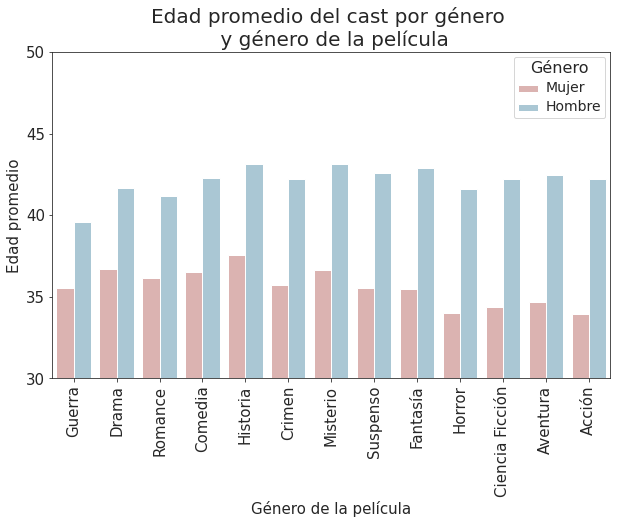

In [135]:
sns.set_style("ticks")
plt.figure(figsize=(10,6))
bp = sns.barplot(x="Género de la película", y="Edad promedio", hue="Género",data=df_genres,
                 palette=["#e2acaa","#a3cadb"],
                 order = ["Guerra", "Drama", "Romance", "Comedia", "Historia", "Crimen",
                          "Misterio", "Suspenso", "Fantasía", "Horror", "Ciencia Ficción",
                          "Aventura", "Acción"])
plt.ylim(30, 50)
plt.xticks(rotation="vertical", fontsize = 15)
plt.xlabel("Género de la película", fontsize = 15)
plt.ylabel("Edad promedio", fontsize = 15)
plt.yticks([30.0,35.0,40.0,45.0,50.0], fontsize = 15)
plt.title("Edad promedio del cast por género \n \
y género de la película", fontsize = 20)
plt.setp([bp.get_legend().get_texts()], fontsize='14') 
plt.setp(bp.get_legend().get_title(), fontsize='16')
plt.show()

### V6

- Consiga la probabilidad de que una productora haga una película según el género para cada uno de los géneros. Para las productoras con participación total mayor a 100 en géneros, ¿cuáles son las dos productoras con más distancia coseno respecto de sus probabilidades? Realice este plot reemplazando los nombres de las productoras por los que corresponden 

![alttext](https://organizacion-de-datos-7506-argerich.github.io/imgs/2c2022/companies.png)

Calcularemos dicha probabilidad usando la medida de probabilidad de *Laplace*, es decir:
- $\mathbb{P}(A) = \frac{|A|}{|\Omega|}$

Donde $|A| =$ número de casos favorables a nuestro experimento, y $|\Omega| = $ número total de casos. En nuestro caso, el primero sería la cantidad de películas de una productora y de un determinado género, y el segundo sería la cantidad total de películas producidas por dicha productora.

Cargamos la tablas que usaremos. Necesitaremos **movies** para poder hacer cosas con la cantidad de películas y sus géneros, y también **companies** para poder utilizar el nombre de las compañías.

In [136]:
df_movies = pd.read_csv(path_a_movies)
df_companies = pd.read_csv(path_a_companies)

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:3326: DtypeWarning: Columns (10) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [137]:
df_movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45466 entries, 0 to 45465
Data columns (total 24 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   adult                  45466 non-null  object 
 1   belongs_to_collection  4494 non-null   object 
 2   budget                 45466 non-null  object 
 3   genres                 43021 non-null  object 
 4   homepage               7782 non-null   object 
 5   id                     45466 non-null  object 
 6   imdb_id                45449 non-null  object 
 7   original_language      45455 non-null  object 
 8   original_title         45466 non-null  object 
 9   overview               44512 non-null  object 
 10  popularity             45461 non-null  object 
 11  poster_path            45080 non-null  object 
 12  production_companies   33585 non-null  object 
 13  production_countries   45463 non-null  object 
 14  release_date           45379 non-null  object 
 15  re

In [138]:
df_companies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23692 entries, 0 to 23691
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      23692 non-null  int64 
 1   name    23692 non-null  object
dtypes: int64(1), object(1)
memory usage: 370.3+ KB


Seleccionamos las columnas que nos interesan de **df_movies**. Necesitamos *production_companies* y *genres*

In [139]:
df_movies_filtered = df_movies[["production_companies", "genres"]]
df_movies_filtered.head(3)

,production_companies,genres
0,3,"Animation,Comedy,Family"
1,"559,2550,10201","Adventure,Fantasy,Family"
2,"6194,19464","Romance,Comedy"


No nos conviene tener las productions companies agrupadas en una sola fila como están ahora pues nos complicaría un posterior join con **df_companies**. Arreglamos esto con ```explode```

In [226]:
separate_companies = lambda companies: str(companies).split(',')
df_companies_and_genres = df_movies_filtered.copy()
df_companies_and_genres["production_companies"] = df_companies_and_genres["production_companies"].map(separate_companies)
df_companies_and_genres = df_companies_and_genres.explode("production_companies")

#transformamos el id a tipo numérico. Para los ids que no funcione los dejamos como NaN para eliminarlos
df_companies_and_genres["production_companies"] = pd.to_numeric(df_companies_and_genres["production_companies"],
                                                                errors = "coerce")

df_companies_and_genres = df_companies_and_genres.rename(columns={"production_companies":"id"})

#filtramos ids nulos
df_companies_and_genres = df_companies_and_genres[df_companies_and_genres["id"].notnull()]
df_companies_and_genres["id"] = df_companies_and_genres["id"].astype(np.int64)
df_companies_and_genres

,id,genres
0,3,"Animation,Comedy,Family"
1,559,"Adventure,Fantasy,Family"
1,2550,"Adventure,Fantasy,Family"
1,10201,"Adventure,Fantasy,Family"
2,6194,"Romance,Comedy"
...,...,...
45460,16323,"Drama,Action,Romance"
45460,38978,"Drama,Action,Romance"
45462,19653,Drama
45463,6165,"Action,Drama,Thriller"


Realizamos el join con **companies** para obtener el nombre de las compañías y nos deshacemos del id luego de eso pues ya no lo utilizaremos más.

In [228]:
df_names_and_genres = df_companies_and_genres.merge(right=df_companies, how="inner", on="id")
df_names_and_genres = df_names_and_genres[["name", "genres"]]

Ya nuestra tabla va tomando forma. Es momento de pensar en qué necesitamos exactamente: Necesitamos obtener el **total de películas producidas por cada estudio**, y el **total de películas producidas por cada género, en cada estudio**. Primero separamos los géneros mediante un ``` explode ```

In [142]:
separate_genres = lambda genres: str(genres).split(',')
df_names_and_genres["genres"] = df_names_and_genres["genres"].map(separate_genres)
df_names_and_genres_exploded = df_names_and_genres.explode("genres")
df_names_and_genres_exploded.head()

,name,genres
0,Pixar Animation Studios,Animation
0,Pixar Animation Studios,Comedy
0,Pixar Animation Studios,Family
1,Pixar Animation Studios,Adventure
1,Pixar Animation Studios,Animation


In [167]:
#liminamos las pelis para las cuales no tenemos género
df_names_and_genres_exploded = df_names_and_genres_exploded[df_names_and_genres_exploded["genres"] != "nan"]

Ahora realizamos el agrupamiento primero por *name* y luego por *genres*, con función de agregación *count*.

In [168]:
df_counted_by_genres = df_names_and_genres_exploded.groupby(["name","genres"]).agg(countByGenre = ("genres", "count"))

df_counted_by_genres = df_counted_by_genres.reset_index()
df_counted_by_genres[df_counted_by_genres["name"] == "Pixar Animation Studios"]

,name,genres,countByGenre
52796,Pixar Animation Studios,Action,2
52797,Pixar Animation Studios,Adventure,10
52798,Pixar Animation Studios,Animation,52
52799,Pixar Animation Studios,Comedy,16
52800,Pixar Animation Studios,Drama,1
52801,Pixar Animation Studios,Family,43
52802,Pixar Animation Studios,Fantasy,3
52803,Pixar Animation Studios,Romance,1


Para sacar el total usamos la tabla sin el ```explode``` para no contar repetidas las pelis con varios géneros 

In [169]:
df_counted_by_total = df_names_and_genres.groupby(["name"]).agg(countTotal=("name","count")).reset_index()
df_counted_by_total[df_counted_by_total["name"] == "Pixar Animation Studios"]

,name,countTotal
16169,Pixar Animation Studios,52


In [170]:
df_counted_full = df_counted_by_genres.merge(df_counted_by_total, on="name", how="inner")
df_counted_full[df_counted_full["name"] == "Pixar Animation Studios"]

,name,genres,countByGenre,countTotal
52796,Pixar Animation Studios,Action,2,52
52797,Pixar Animation Studios,Adventure,10,52
52798,Pixar Animation Studios,Animation,52,52
52799,Pixar Animation Studios,Comedy,16,52
52800,Pixar Animation Studios,Drama,1,52
52801,Pixar Animation Studios,Family,43,52
52802,Pixar Animation Studios,Fantasy,3,52
52803,Pixar Animation Studios,Romance,1,52


Ya tenemos una tabla con todo lo que necesitamos para calcular la probabilidad de que una película sea de un genero determinado dado que ya la produjo una productora en particular. Solo nos queda aplicar la función de probabilidad definida al principio.

In [171]:
df_counted_full["probByGenre"] = df_counted_full["countByGenre"]/df_counted_full["countTotal"]
df_counted_full[df_counted_full["name"] == "Pixar Animation Studios"]

,name,genres,countByGenre,countTotal,probByGenre
52796,Pixar Animation Studios,Action,2,52,0.038462
52797,Pixar Animation Studios,Adventure,10,52,0.192308
52798,Pixar Animation Studios,Animation,52,52,1.000000
52799,Pixar Animation Studios,Comedy,16,52,0.307692
52800,Pixar Animation Studios,Drama,1,52,0.019231
52801,Pixar Animation Studios,Family,43,52,0.826923
52802,Pixar Animation Studios,Fantasy,3,52,0.057692
52803,Pixar Animation Studios,Romance,1,52,0.019231


Ahora podemos empezar con la segunda parte de la consigna. Lo primero que hacemos es filtrar la tabla para obtener las productoras con más de 100 películas.

Luego, nos interesan las probabilidades, los géneros y los nombres. Filtramos para quedarnos solo con eso y luego pivotamos la tabla y trasponemos para poder tener cada vector de probabilidad como columna


In [234]:
df_counted_full[df_counted_full["countTotal"] > 100]["name"].nunique()

29

In [172]:
df_counted_full_filtered = df_counted_full[df_counted_full["countTotal"] > 100]
df_counted_full_filtered = df_counted_full_filtered[["name", "genres", "probByGenre"]]

In [230]:
df_counted_full_pivoted = df_counted_full_filtered.pivot_table(index="name", columns = "genres").fillna(0)
df_counted_full_pivoted.head(3)

probByGenre                      \
genres                                      Action Adventure Animation   
name                                                                     
BBC Films                                 0.053435  0.022901  0.000000   
British Broadcasting Corporation (BBC)    0.033898  0.050847  0.016949   
Canal+                                    0.098174  0.066210  0.009132   

                                                                        \
genres                                    Comedy     Crime Documentary   
name                                                                     
BBC Films                               0.305344  0.091603    0.022901   
British Broadcasting Corporation (BBC)  0.194915  0.076271    0.237288   
Canal+                                  0.278539  0.130137    0.018265   

                                                                      \
genres                                     Drama    Family   Fantasy   
name                                                                   
BBC Films                               0.748092  0.038168  0.007634   
British Broadcasting Corporation (BBC)  0.644068  0.050847  0.059322   
Canal+                                  0.682648  0.022831  0.034247   

                                                                      \
genres                                   Foreign   History    Horror   
name                                                                   
BBC Films                               0.007634  0.114504  0.061069   
British Broadcasting Corporation (BBC)  0.050847  0.059322  0.033898   
Canal+                                  0.036530  0.057078  0.054795   

                                                                      \
genres                                     Music   Mystery   Romance   
name                                                                   
BBC Films                               0.038168  0.076336  0.305344   
British Broadcasting Corporation (BBC)  0.025424  0.127119  0.186441   
Canal+                                  0.015982  0.063927  0.223744   

                                                                            \
genres                                 Science Fiction  TV Movie  Thriller   
name                                                                         
BBC Films                                     0.030534  0.030534  0.198473   
British Broadcasting Corporation (BBC)        0.050847  0.144068  0.127119   
Canal+                                        0.027397  0.000000  0.180365   

                                                            
genres                                       War   Western  
name                                                        
BBC Films                               0.045802  0.000000  
British Broadcasting Corporation (BBC)  0.067797  0.008475  
Canal+                                  0.047945  0.009132

Finalmente, armamos una matriz de distancias coseno, y sacamos el máximo

In [176]:
from scipy.spatial.distance import pdist
from scipy.spatial.distance import squareform

maximum_distances =pd.DataFrame(np.max(pd.DataFrame(
    squareform(pdist(df_counted_full_pivoted, metric="cosine")),
    columns = df_counted_full_pivoted.index,
    index = df_counted_full_pivoted.index
)))

companies = maximum_distances[maximum_distances[0] == np.max(maximum_distances[0])].index
companies

Index(['Centre National de la Cinématographie (CNC)', 'Walt Disney Productions'], dtype='object', name='name')

Vemos que la máxima distancia coseno la tiene Disney y el CNC francés. Con esa información ya estamos en condiciones de hacer el plot.

In [218]:
df_probs_disney_and_cnc = df_counted_full_filtered[df_counted_full_filtered["name"].isin(
    [companies[0], companies[1]])]

In [219]:
generos_para_el_plot = ["Animation", "Horror", "Family", "Thriller", "Comedy", "Adventure", "Drama",
                        "Action", "Mystery", "Romance", "Fantasy", "Science Fiction", "Western",
                        "Music", "Documentary", "Crime"]
df_probs_disney_and_cnc_generos_relevantes = df_probs_disney_and_cnc[df_probs_disney_and_cnc["genres"].isin(generos_para_el_plot)]

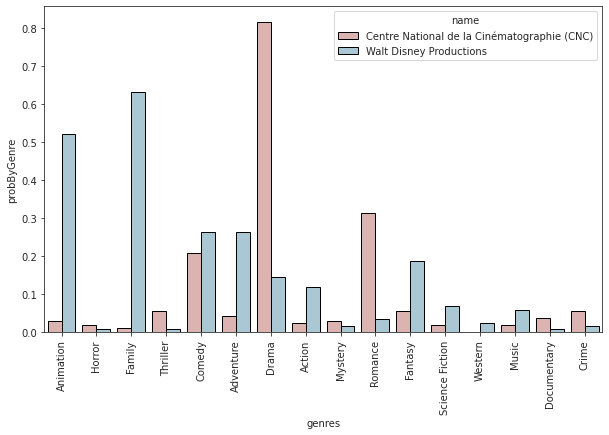

In [220]:
sns.set_style("ticks")
plt.figure(figsize=(10,6))
bp = sns.barplot(x="genres", y="probByGenre", hue="name",
                 data=df_probs_disney_and_cnc_generos_relevantes,
                 palette=["#e2acaa","#a3cadb"],
                 order = generos_para_el_plot,  
                 edgecolor = ".0")
plt.xticks(rotation="vertical")
plt.show()

## Parte II: Visualización de datos

In [304]:
df_vih_sexo = pd.read_csv("http://datos.salud.gob.ar/dataset/1f70534d-f5f0-41f7-bc9a-b9809c39a505/resource/540bde9f-8135-4385-9a94-0ac9cedec6f2/download/notificacion-casos-vih-sexo-jurisdiccion-2010-2019-argentina_1-1.csv",
                          index_col=0, encoding='latin-1')
df_vih_edad = pd.read_csv("http://datos.salud.gob.ar/dataset/1f70534d-f5f0-41f7-bc9a-b9809c39a505/resource/cb5c81ae-9ec7-471d-b14f-6b8c1e225ea7/download/notificacion-casos-vih-sexo-grupo-etario-2010-2019-argentina_1.csv",
                          index_col=0, encoding='latin-1')

In [305]:
df_vih_sexo.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 750 entries, 3 to 1
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   sexo             750 non-null    object
 1   id_jurisdiccion  750 non-null    int64 
 2   jurisdiccion     750 non-null    object
 3   anio             750 non-null    int64 
 4   casos_vih        750 non-null    int64 
dtypes: int64(3), object(2)
memory usage: 35.2+ KB


In [309]:
df_vih_sexo.head()

,sexo,id_jurisdiccion,jurisdiccion,anio,casos_vih
id_sexo,,,,,
3,ambos_sexos,200,ARG,2010,7188
3,ambos_sexos,200,ARG,2011,7171
3,ambos_sexos,200,ARG,2012,7206
3,ambos_sexos,200,ARG,2013,7218
3,ambos_sexos,200,ARG,2014,6522


Primero haremos un **stacked bar plot** de los casos de vih por año, separando por hombre y mujer, con el objetivo de ver simultáneamente como varían los casos año a año, y sus proporciones relativas entre los dos sexos.

In [310]:
# Las filas con ambos_sexos no son útiles
df_vih_sexo_filtrado = df_vih_sexo[df_vih_sexo["sexo"] != "ambos_sexos"]

In [320]:
#agrupamos por año y sexo
df_vih_sexo_agrupados_por_anio = df_vih_sexo_filtrado.groupby(["anio", "sexo"]).agg(totalCasosDelAnio = ("casos_vih", "sum")).reset_index()
df_vih_agrupados_por_anio = df_vih_sexo_filtrado.groupby("anio").agg(totalCasosDelAnio = ("casos_vih", "sum")).reset_index()
df_vih_mujeres_agrupados_por_anio = df_vih_sexo_agrupados_por_anio[df_vih_sexo_agrupados_por_anio["sexo"] == "mujeres"]

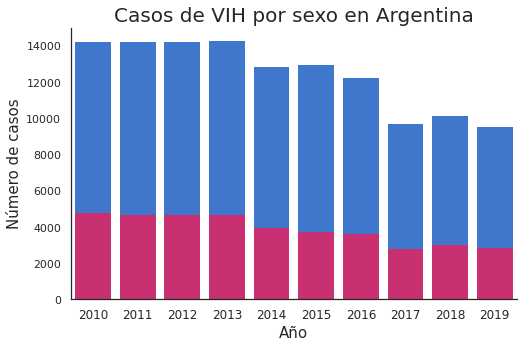

In [402]:
plt.figure(figsize = (8,5))
sns.barplot(x="anio",  y="totalCasosDelAnio", data=df_vih_agrupados_por_anio, color='#2772E2', edgecolor = "none", dodge = False)
sns.barplot(x="anio", y="totalCasosDelAnio", data=df_vih_mujeres_agrupados_por_anio,  color='#E2176F', edgecolor = "none", dodge = False)
plt.xlabel("Año", fontsize = 15)
plt.xticks(fontsize = 12)
plt.ylabel("Número de casos", fontsize = 15)
sns.despine()
plt.ylim(0, 15000)
plt.title("Casos de VIH por sexo en Argentina", fontsize = 20)
plt.grid(False);

Ahora usaremos la segunda parte del dataset, con el objetivo de analizar cómo afecta el grupo etáreo a la cantidad de casos de VIH. Haremos un **boxplot agrupado por sexo**.

In [403]:
df_vih_edad_sexos = df_vih_edad[(df_vih_edad['sexo'] != 'ambos_sexos') & (df_vih_edad["grupo_etario"] != "total_grupo")]
df_vih_edad_sexos_sin_outliers = df_vih_edad_sexos[(df_vih_edad_sexos["id_grupo_etario"] > 3) & (df_vih_edad_sexos["id_grupo_etario"] < 8)]

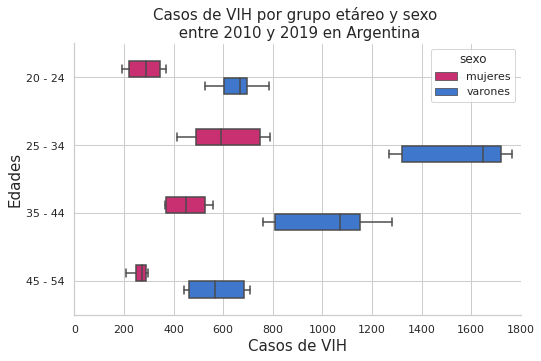

In [422]:
plt.figure(figsize = (8,5))
sns.set(style="whitegrid")
sns.boxplot(x="casos_vih", y="grupo_etario",
            hue="sexo", palette=["#E2176F", "#2772E2"],
            data=df_vih_edad_sexos_sin_outliers,
            width=0.5)
plt.title("Casos de VIH por grupo etáreo y sexo \n entre 2010 y 2019 en Argentina", fontsize = 15)
plt.ylabel("Edades", fontsize = 15)
plt.xlabel("Casos de VIH", fontsize = 15)
plt.xlim(0,1800)
plt.grid(True)
sns.despine();